## Regresión Logística enfocada a la temperatura o clima

In [1]:
# Librerias necesarias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [2]:
# Traemos los datos 
data = "../Data/weather_forecast_data.csv"
 
weather = pd.read_csv(data, delimiter=',')
# Convertimos la data a df, obtenemos punto de reinicio
df_weather = pd.DataFrame(weather) 

In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [4]:
df_weather.head(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain


Tenemos columnas predictoras como:
- Temperatura
- Humedad 
- Velocidad del viento 
- Cobertura de nubes
- Presión 

In [5]:
df_weather['Rain'].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [6]:
# Dividimos los datos en variables predictoras (X) y target (Y)
X = df_weather.drop('Rain', axis=1)
y = df_weather['Rain']

In [7]:
# veamos cuantas valores hay para cada uno de los target
print(y.value_counts())

Rain
no rain    2186
rain        314
Name: count, dtype: int64


Tenemos datos desbalanceados.
- no rain 3286
- rain  314

In [8]:
# Cantidad de datos
print(X.shape)
print(y.shape)

(2500, 5)
(2500,)


In [9]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Verificamos las dimensiones de los datos
print(f"Cantidad total de datos (variables predictoras): {X.shape}")
print(f"Cantidad total de datos (variable objetivo): {y.shape}")
print(f"Cantidad de datos de entrenamiento (X_train): {X_train.shape}")
print(f"Cantidad de datos de prueba (X_test): {X_test.shape}")
print(f"Cantidad de datos de entrenamiento (y_train): {y_train.shape}")
print(f"Cantidad de datos de prueba (y_test): {y_test.shape}")

Cantidad total de datos (variables predictoras): (2500, 5)
Cantidad total de datos (variable objetivo): (2500,)
Cantidad de datos de entrenamiento (X_train): (2000, 5)
Cantidad de datos de prueba (X_test): (500, 5)
Cantidad de datos de entrenamiento (y_train): (2000,)
Cantidad de datos de prueba (y_test): (500,)


In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicar el sobremuestro SMOTE - oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribucion despues del SMOTE", Counter(y_train_resampled))

Distribucion despues del SMOTE Counter({'no rain': 1743, 'rain': 1743})


In [13]:
# Nueva cantidad de datos 
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(3486, 5)
(3486,)


In [14]:
# Creamos el modelo 
modelo = LogisticRegression(random_state=42)

In [16]:
# Entrenamos el modelo 
modelo.fit(X_train_resampled, y_train_resampled)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
# Generamos la predicion del modelo
modelo_predi = modelo.predict(X_test)

In [18]:
#print(accuracy_score(y_test, modelo))
print(accuracy_score(y_test, modelo_predi))

0.894


In [19]:
# Verificamos su efectividad
print(confusion_matrix(y_test, modelo_predi))
print(classification_report(y_test, modelo_predi))

[[396  47]
 [  6  51]]
              precision    recall  f1-score   support

     no rain       0.99      0.89      0.94       443
        rain       0.52      0.89      0.66        57

    accuracy                           0.89       500
   macro avg       0.75      0.89      0.80       500
weighted avg       0.93      0.89      0.91       500



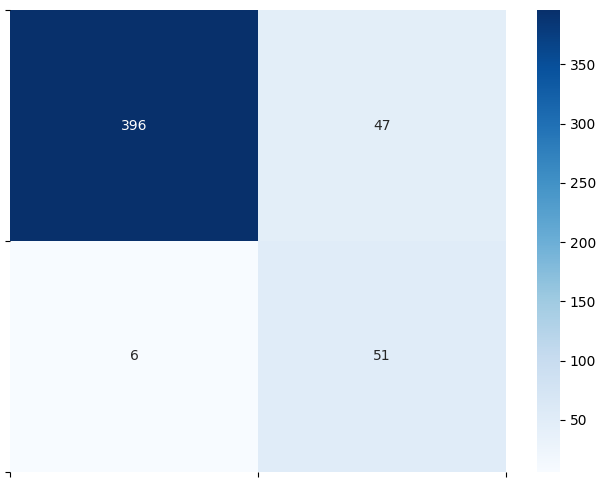

In [27]:
import matplotlib.ticker as ticker
# Graficamos la matrix de confusion
plt.figure(figsize=(8,6))

corr = confusion_matrix(y_test, modelo_predi)
ax = sns.heatmap(corr, annot=True, fmt="g", cmap='Blues')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

In [22]:
# mapeamos las etiquetas a valores binarios para poder calcular el AUC
y_test_binary = y_test.map({'no rain': 0, 'rain': 1})

In [23]:
# Obtenemos las probabilidades de la clase positiva 
y_proba = modelo.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9588531147281296


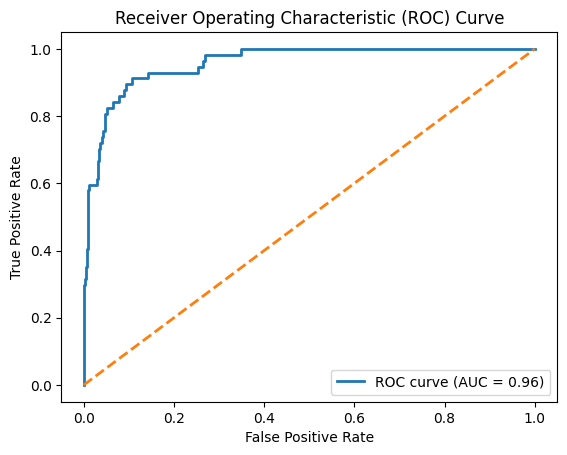

In [24]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Ejemplo con nuevos datos 
nuevos_datos = [[23.720338, 89.592641, 7.335604, 50.501694, 1032.378759]]
prediccion = modelo.predict(nuevos_datos)
print(f"Predicción: {prediccion}")

Predicción: ['no rain']


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
